# **Data Analysis - Final Project** <br>
**Karin Binyaminyan** <br>
**Racheli Mandelblit**<br>
**Dor Gaon**


# **Library**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import matplotlib as mpl
import seaborn as sns
from scipy import stats

# **Data Reading**

In [ ]:
#Inserting the data as a dataframe
#The dataframe will include the defaul integer index, including the 'id' column in the data which is the given index.
#Therefore we will change the defaul integer index to the 'id' column using the set_index method.
data = pd.read_csv('tomatoes.csv')
tomatoes_data=pd.DataFrame(data)
tomatoes_data.set_index('id', inplace=True)
tomatoes_data

,Average Plant Size,Bee_1 Pollination Activity,bee_2 Pollination Activity,bee_3 Pollination Activity,bee_4 Pollination Activity,Maximum Upper Bloom Temperature,Minimum Upper Bloom Temperature,Average Upper Bloom Temperature,Maximum Lower Bloom Temperature,Minimum Lower Bloom Temperature,Average Lower Bloom Temperature,Total Rainy Days,Proportion of Rainy Days,fruit_set,mass_of_fruit,average_seeds,tomato_yield
id,,,,,,,,,,,,,,,,,
0,25.0,0.50,0.25,0.75,0.50,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.425011,0.417545,32.460887,4476.81146
1,25.0,0.50,0.25,0.50,0.50,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.444908,0.422051,33.858317,5548.12201
2,12.5,0.25,0.25,0.63,0.63,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.552927,0.470853,38.341781,6869.77760
3,12.5,0.25,0.25,0.63,0.50,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.565976,0.478137,39.467561,6880.77590
4,25.0,0.50,0.25,0.63,0.63,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.579677,0.494165,40.484512,7479.93417
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15284,12.5,0.25,0.25,0.38,0.50,77.4,46.8,64.7,55.8,27.0,45.8,16.0,0.26,0.556302,0.476308,40.546480,7667.83619
15285,12.5,0.25,0.25,0.25,0.50,86.0,52.0,71.9,62.0,30.0,50.8,34.0,0.56,0.354413,0.388145,29.467434,3680.56025
15286,25.0,0.50,0.25,0.38,0.75,77.4,46.8,64.7,55.8,27.0,45.8,34.0,0.56,0.422548,0.416786,32.299059,4696.44394


# **Data Type Checking**

In that part we'll check the data type of each column.

In [ ]:
tomatoes_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15289 entries, 0 to 15288
Data columns (total 17 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Average Plant Size               15289 non-null  float64
 1   Bee_1 Pollination Activity       15289 non-null  float64
 2   bee_2 Pollination Activity       15289 non-null  float64
 3   bee_3 Pollination Activity       15289 non-null  float64
 4   bee_4 Pollination Activity       15289 non-null  float64
 5   Maximum Upper Bloom Temperature  15289 non-null  float64
 6   Minimum Upper Bloom Temperature  15289 non-null  float64
 7   Average Upper Bloom Temperature  15289 non-null  object 
 8   Maximum Lower Bloom Temperature  15289 non-null  float64
 9   Minimum Lower Bloom Temperature  15289 non-null  float64
 10  Average Lower Bloom Temperature  15289 non-null  float64
 11  Total Rainy Days                 15289 non-null  float64
 12  Proportion of Rainy Day

## **Handling Data Type Mistake and Data Type Classification**

There is one object variable - "Average Upper Bloom Tempratue". <br>
From the dicription of the data all of the variables numeric. We will convert this variable into numeric variable.

In [ ]:
#Converting the categorial column into a numeric column. We will use pd.to_numeric function, the errors='coerce' argument will replace all non-numeric values with NaN
tomatoes_data['Average Upper Bloom Temperature'] = pd.to_numeric(tomatoes_data['Average Upper Bloom Temperature'], errors='coerce')

#Check using the is_categotical method - if it will return "False", then all the variables are numerical(float/int).
#If it will return "True" then one (or more) variables are still numerical.
numerical_cols = tomatoes_data.select_dtypes(include=['int64', 'float64']).columns
print(numerical_cols.is_categorical())

False


<ipython-input-21-669eccf3fcb3>:7: FutureWarning: Index.is_categorical is deprecated.Use pandas.api.types.is_categorical_dtype instead
  print(numerical_cols.is_categorical())


Here we classify each feature into the 2 following categories :  Categorical or Numerical.

In [ ]:
#describing  the categorial and numerical colunms
categorical_cols = tomatoes_data.select_dtypes(include=['object', 'category']).columns
numerical_cols = tomatoes_data.select_dtypes(include=['int64', 'float64']).columns
#describing  the categorial and numerical colunms
categorical_cols = tomatoes_data.select_dtypes(include=['object', 'category']).columns
numerical_cols = tomatoes_data.select_dtypes(include=['int64', 'float64']).columns
table_df = pd.DataFrame({
    'Variable Name': list(categorical_cols) + list(numerical_cols),
    'Type': ['Categorical'] * len(categorical_cols) + ['Numerical'] * len(numerical_cols)
})
table_df


,Variable Name,Type
0,Average Plant Size,Numerical
1,Bee_1 Pollination Activity,Numerical
2,bee_2 Pollination Activity,Numerical
3,bee_3 Pollination Activity,Numerical
4,bee_4 Pollination Activity,Numerical
5,Maximum Upper Bloom Temperature,Numerical
6,Minimum Upper Bloom Temperature,Numerical
7,Average Upper Bloom Temperature,Numerical
8,Maximum Lower Bloom Temperature,Numerical
9,Minimum Lower Bloom Temperature,Numerical


In [ ]:
#Counting the amount of each type of variable.
num_categorical = len(categorical_cols)
num_numerical = len(numerical_cols)

print(f"Number of Categorical columns: {num_categorical}")
print(f"Number of Numerical columns: {num_numerical}")

Number of Categorical columns: 0
Number of Numerical columns: 17


All variables are numerical.

# **Checking For Missing Values**

We used 'select_dtype' to filter the colums based on their data types. <br>
Then we created a new data frame to present the results. <br>
All the variables are numerical which matches the description of the data.

In [ ]:
#Looking for missing values (casting to dataframe so will print out nicely).
missing_values=pd.DataFrame(tomatoes_data.isna().sum())
missing_values

,0
Average Plant Size,0
Bee_1 Pollination Activity,0
bee_2 Pollination Activity,0
bee_3 Pollination Activity,0
bee_4 Pollination Activity,0
Maximum Upper Bloom Temperature,0
Minimum Upper Bloom Temperature,0
Average Upper Bloom Temperature,5
Maximum Lower Bloom Temperature,0
Minimum Lower Bloom Temperature,0


In the table above we can see that there are 5 missing values from the 'Average Upper Bloom Temperature' variable. We'll replace the missing values using 'fillna' with the average of the maximum and minimum upper bloom temprature from the same observation in the given data.

In [ ]:
tomatoes_data['Average Upper Bloom Temperature']=tomatoes_data['Average Upper Bloom Temperature'].fillna((tomatoes_data['Maximum Upper Bloom Temperature']+tomatoes_data['Minimum Upper Bloom Temperature'])/2)

In [ ]:
#check
missing_values=pd.DataFrame(tomatoes_data.isna().sum())
missing_values

,0
Average Plant Size,0
Bee_1 Pollination Activity,0
bee_2 Pollination Activity,0
bee_3 Pollination Activity,0
bee_4 Pollination Activity,0
Maximum Upper Bloom Temperature,0
Minimum Upper Bloom Temperature,0
Average Upper Bloom Temperature,0
Maximum Lower Bloom Temperature,0
Minimum Lower Bloom Temperature,0


# **Some Statistics about the Data**

In [ ]:
#describing the data
tomatoes_data.describe()

,Average Plant Size,Bee_1 Pollination Activity,bee_2 Pollination Activity,bee_3 Pollination Activity,bee_4 Pollination Activity,Maximum Upper Bloom Temperature,Minimum Upper Bloom Temperature,Average Upper Bloom Temperature,Maximum Lower Bloom Temperature,Minimum Lower Bloom Temperature,Average Lower Bloom Temperature,Total Rainy Days,Proportion of Rainy Days,fruit_set,mass_of_fruit,average_seeds,tomato_yield
count,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000
mean,19.704690,0.389314,0.286768,0.492675,0.592355,82.147034,49.673281,68.655360,59.229538,28.660553,48.568500,18.660865,0.324176,0.502741,0.446553,36.164950,6025.193999
std,6.595211,0.361643,0.059917,0.148115,0.139489,9.363749,5.546405,7.641803,6.610640,3.195367,5.390545,11.657582,0.163905,0.074390,0.037035,4.031087,1337.056850
min,10.000000,0.000000,0.000000,0.000000,0.000000,-100.000000,39.000000,55.900000,50.200000,24.300000,41.200000,1.000000,0.060000,0.192732,0.311921,22.079199,1945.530610
25%,12.500000,0.250000,0.250000,0.380000,0.500000,77.400000,46.800000,64.700000,55.800000,27.000000,45.800000,16.000000,0.260000,0.458246,0.419216,33.232449,5128.163510
50%,25.000000,0.500000,0.250000,0.500000,0.630000,86.000000,52.000000,71.900000,62.000000,30.000000,50.800000,16.000000,0.260000,0.506600,0.446570,36.040675,6117.475900
75%,25.000000,0.500000,0.380000,0.630000,0.750000,86.000000,52.000000,71.900000,62.000000,30.000000,50.800000,24.000000,0.390000,0.560445,0.474134,39.158238,7019.694380
max,40.000000,18.430000,0.585000,0.750000,0.750000,94.600000,57.200000,79.000000,68.200000,33.000000,55.900000,34.000000,0.560000,0.652144,0.535660,46.585105,8969.401840


The following table decribes the number of objects, mean, standard deviation, minimum, maximum and the quarterly percentages of each variable.
Main points arising from the description of the data:
* Bees -
1. The minimum value for all bee activity columns is 0, indicating there are cases where no pollination activity was recorded.
2. Bee #2 has the lowest mean and median (0.286 and 0.250, respectively),  which indicates that bee #2 is less active in pollination. Bee #2 also has the lowest standard deviation which indicates that the their pollination activity is more consistent.
3. Bee #4 has the highest mean and median (0.592 and 0.630, respectively) which indicates that bee #4 is the most active from the observed bees.
4. The maximum values for bees 2,3, and 4 pollination activity range from 0.58 to 0.75, while bee #1 has a significant higher maximum pollination activity rate of 18.43. In addition, standard deviation of bee #1 is the highest (0.36), which indicates that the their pollination activity is more consistent. However, the mean and the quarterly percentages of bee #1 are closer to the rest of the bees.
* Average Plant Size -
The average plant size ranges from 10 to 40 units (minimum and maximum) with a mean of 19.7.
The standard deviation is 6.59 units which may indicate a moderate variability in plant sizes.
* Maximum and Minimum Upper Bloom Temperature-
The Maximum Upper Bloom Temperature has a  minimum value of -100 (which seems unusual for bloom temprature), while the Minimum Upper Bloom Temperature has a minumum of 39. The minimum bloom temperatures and for the Maximum Upper Bloom Temperature cannot be lower than the minimum of the Minimum Upper Bloom Temperature. This may suggest a data entry error. We will handle these values in the next section.



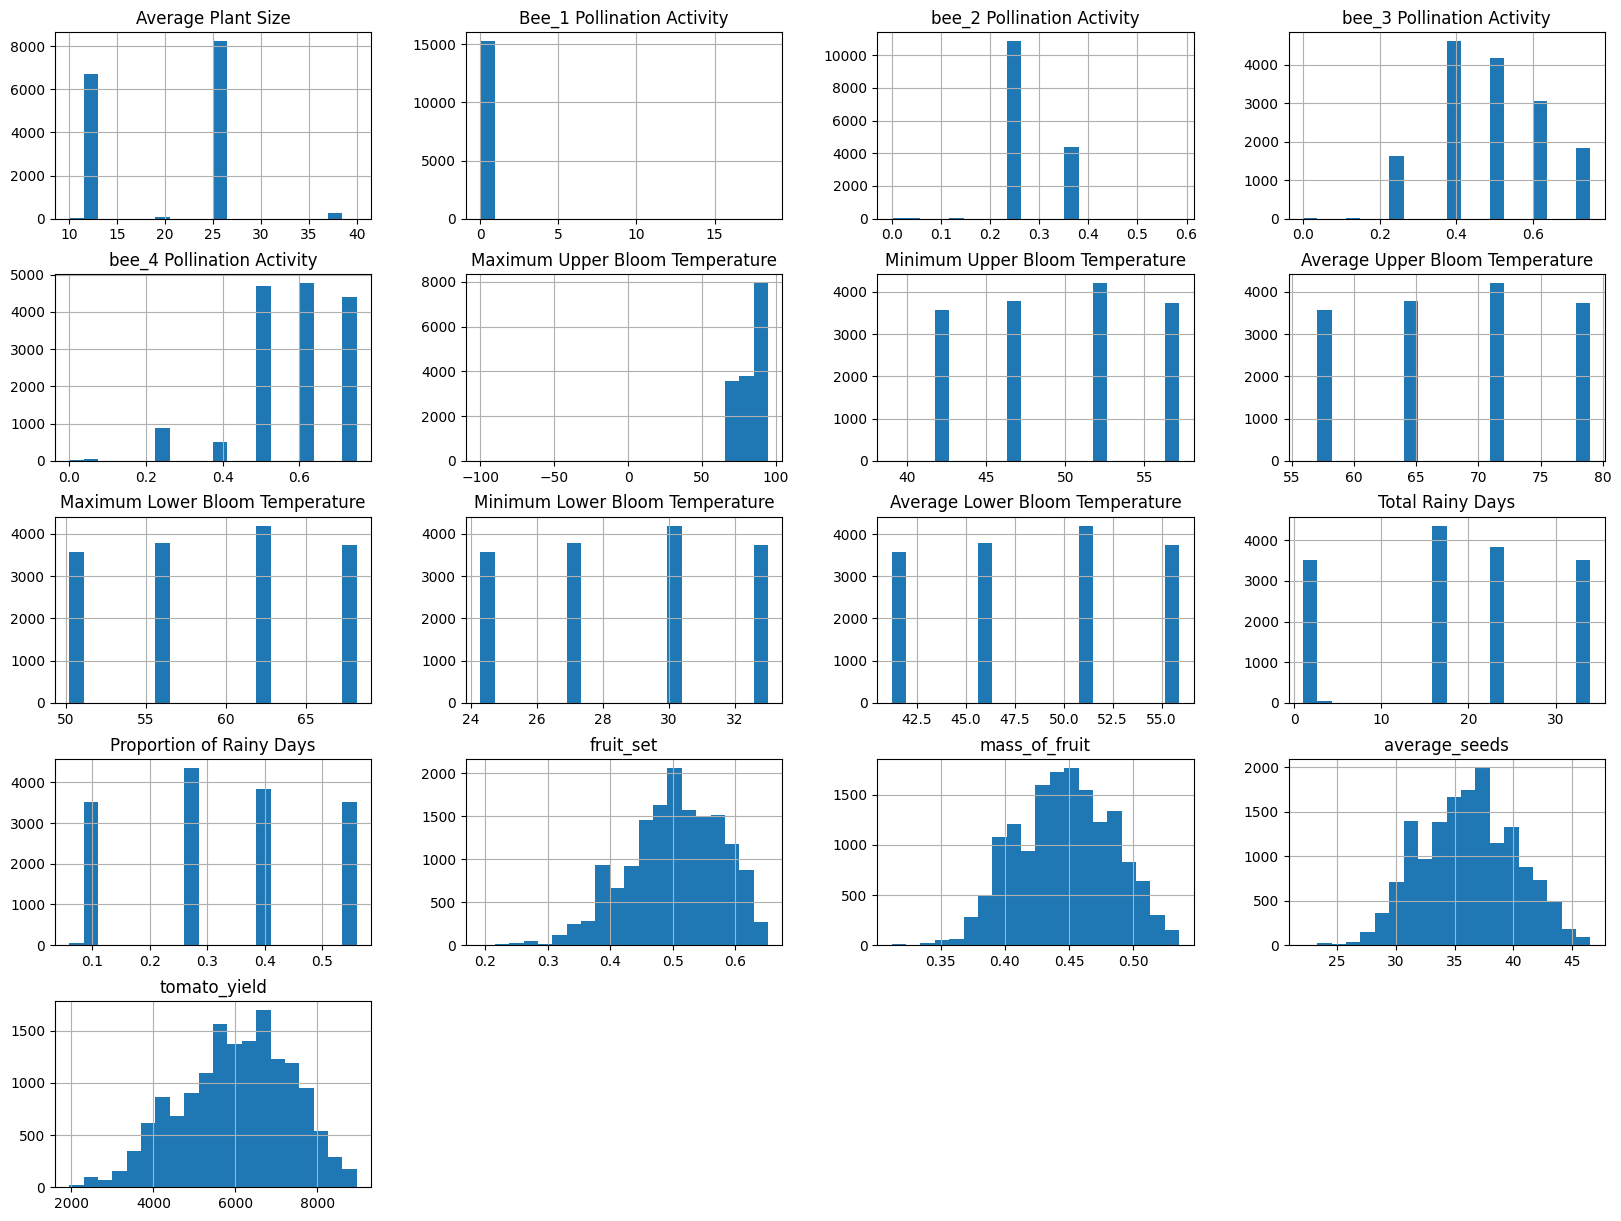

In [ ]:

tomatoes_data.hist(layout=(5,4), figsize=(20,15), bins=20)
plt.show()

In [ ]:
#describing the variables accourding to the given data description.
dataset = pd.read_csv('Dataset Description.csv')
des_data=pd.DataFrame(dataset)
des_data

,Variable,Description
0,id,index
1,Average Plant Size (m²),The typical size (area) occupied by a single ...
2,Bee_1 Pollination Activity (bees/m²/min),The average number of bees (from type 1) visit...
3,bee_2 Pollination Activity (bees/m²/min),The average number of bees (from type 2) visit...
4,bee_3 Pollination Activity (bees/m²/min),The average number of bees (from type 3) visit...
5,bee_4 Pollination Activity (bees/m²/min),The average number of bees (from type 4) visit...
6,Maximum Upper Bloom Temperature (°C),The highest recorded daily air temperature wit...
7,Minimum Upper Bloom Temperature (°C),The lowest recorded daily air temperature with...
8,Average Upper Bloom Temperature (°C),The average daily air temperature within the o...
9,Maximum Lower Bloom Temperature (°C),The highest recorded daily air temperature bel...


From the discrition of the data, all variables should be continuous.

In [ ]:
#Describing the minimum and maximum values of all variables.
min_values = tomatoes_data.min()
max_values = tomatoes_data.max()
min_max_df = pd.DataFrame({'Minimum Values': min_values, 'Maximum Values': max_values})

min_max_df



,Minimum Values,Maximum Values
Average Plant Size,10.000000,40.000000
Bee_1 Pollination Activity,0.000000,18.430000
bee_2 Pollination Activity,0.000000,0.585000
bee_3 Pollination Activity,0.000000,0.750000
bee_4 Pollination Activity,0.000000,0.750000
Maximum Upper Bloom Temperature,-100.000000,94.600000
Minimum Upper Bloom Temperature,39.000000,57.200000
Average Upper Bloom Temperature,55.900000,79.000000
Maximum Lower Bloom Temperature,50.200000,68.200000
Minimum Lower Bloom Temperature,24.300000,33.000000


# **Checking for Correlation**

In [ ]:
#Creating a correlation matrix
correlation_matrix = tomatoes_data.corr(method='pearson')


In [ ]:
corr_matrix=pd.DataFrame(correlation_matrix)
corr_matrix


,Average Plant Size,Bee_1 Pollination Activity,bee_2 Pollination Activity,bee_3 Pollination Activity,bee_4 Pollination Activity,Maximum Upper Bloom Temperature,Minimum Upper Bloom Temperature,Average Upper Bloom Temperature,Maximum Lower Bloom Temperature,Minimum Lower Bloom Temperature,Average Lower Bloom Temperature,Total Rainy Days,Proportion of Rainy Days,fruit_set,mass_of_fruit,average_seeds,tomato_yield
Average Plant Size,1.000000,0.304130,0.080433,0.065131,-0.007607,0.016102,0.015838,0.015963,0.016343,0.016026,0.015987,0.165770,0.164823,-0.406793,-0.377688,-0.396898,-0.382619
Bee_1 Pollination Activity,0.304130,1.000000,-0.017937,0.030671,-0.010394,0.005788,0.005755,0.005856,0.005942,0.005809,0.005485,0.046494,0.037532,-0.120492,-0.135310,-0.139261,-0.118001
bee_2 Pollination Activity,0.080433,-0.017937,1.000000,-0.164962,0.158001,-0.000558,-0.001813,-0.001836,-0.001613,-0.001804,-0.001644,-0.063294,-0.060232,0.160447,0.163987,0.177022,0.161145
bee_3 Pollination Activity,0.065131,0.030671,-0.164962,1.000000,0.309556,-0.014907,-0.012928,-0.013045,-0.012924,-0.013035,-0.013071,-0.026572,-0.027193,0.073669,0.064722,0.063504,0.073969
bee_4 Pollination Activity,-0.007607,-0.010394,0.158001,0.309556,1.000000,-0.031269,-0.030819,-0.031428,-0.031398,-0.031486,-0.031337,-0.079874,-0.078720,0.209495,0.192210,0.200597,0.198264
Maximum Upper Bloom Temperature,0.016102,0.005788,-0.000558,-0.014907,-0.031269,1.000000,0.975590,0.976742,0.976474,0.976794,0.976737,0.011617,0.011068,0.005284,0.140433,0.057967,-0.021274
Minimum Upper Bloom Temperature,0.015838,0.005755,-0.001813,-0.012928,-0.030819,0.975590,1.000000,0.998983,0.998199,0.998953,0.999040,0.011727,0.010767,0.008409,0.147203,0.061812,-0.021929
Average Upper Bloom Temperature,0.015963,0.005856,-0.001836,-0.013045,-0.031428,0.976742,0.998983,1.000000,0.999443,0.999951,0.999952,0.011248,0.010266,0.008517,0.147679,0.062091,-0.021868
Maximum Lower Bloom Temperature,0.016343,0.005942,-0.001613,-0.012924,-0.031398,0.976474,0.998199,0.999443,1.000000,0.999489,0.999423,0.011302,0.010262,0.007902,0.146668,0.061378,-0.022197
Minimum Lower Bloom Temperature,0.016026,0.005809,-0.001804,-0.013035,-0.031486,0.976794,0.998953,0.999951,0.999489,1.000000,0.999963,0.011466,0.010479,0.007909,0.146704,0.061360,-0.022319


We'll print a heatmap in order to get better vizualisation and understanding of the correlation matrix.

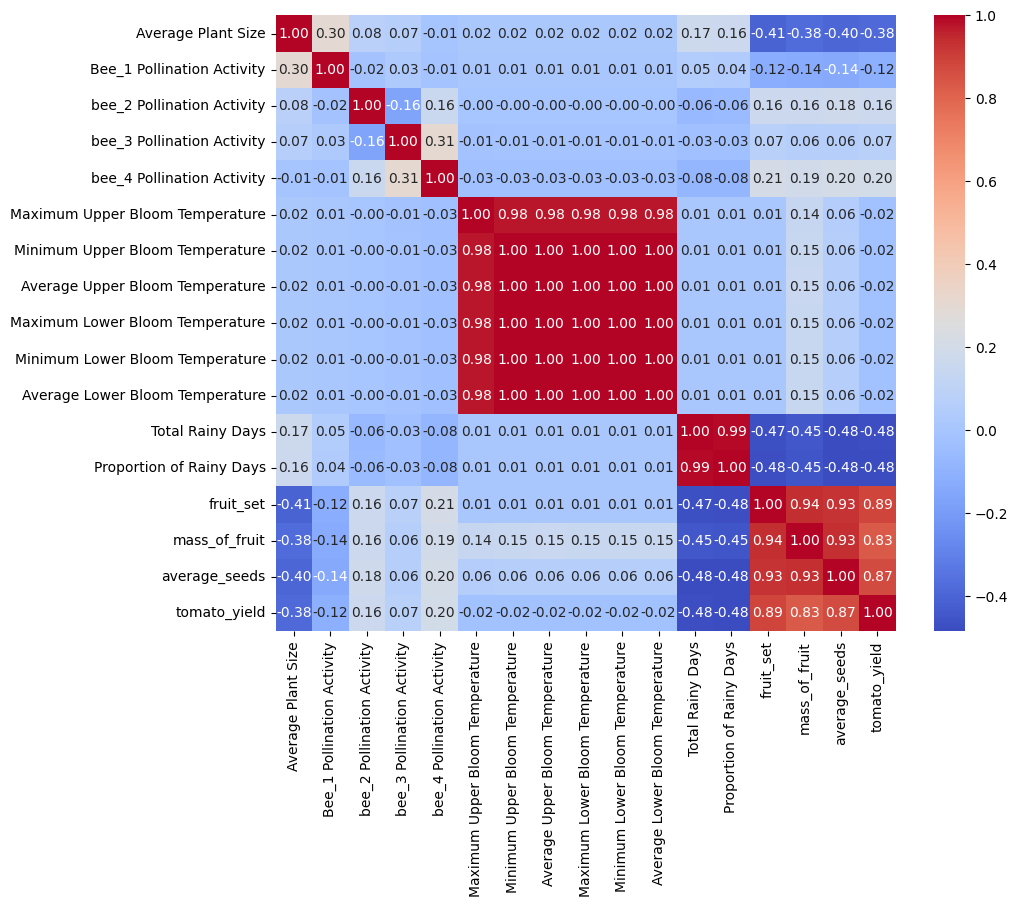

In [ ]:
#creating a heatmap to see the correlation between each variable
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.show()

The following heatmap present the variables in a clrearer view. Red represent positive correlation while blue represnts negative correlation. The darker the color, the greater the correlation.
As we can see, the temprature variables have high correlations between each of the temprature variables.
In addition, we can see the negative correlation between rainy days "Total_Rainy_Days" and the quality of the fruit- "Fruit_Set" "average_seeds" "mass_of_fruit" and "tomato_yield"
From this, it can be concluded that rainy days damage the agricultural produce of tomatoes and that the fruit grows optimally the fewer rainy days there are.



# **Correlation Ranking**

In [ ]:
corr_tomato_yield = correlation_matrix['tomato_yield']

print(corr_tomato_yield)


Average Plant Size                -0.382619
Bee_1 Pollination Activity        -0.118001
bee_2 Pollination Activity         0.161145
bee_3 Pollination Activity         0.073969
bee_4 Pollination Activity         0.198264
Maximum Upper Bloom Temperature   -0.021274
Minimum Upper Bloom Temperature   -0.021929
Average Upper Bloom Temperature   -0.021868
Maximum Lower Bloom Temperature   -0.022197
Minimum Lower Bloom Temperature   -0.022319
Average Lower Bloom Temperature   -0.022081
Total Rainy Days                  -0.477191
Proportion of Rainy Days          -0.483870
fruit_set                          0.885967
mass_of_fruit                      0.826481
average_seeds                      0.868853
tomato_yield                       1.000000
Name: tomato_yield, dtype: float64


The following variables have the highest correlation with 'tomamto_yield':
1. 'fruit_set' (correlation of 0.886)
2. 'average_seeds' (correlation of 0.869)
3. 'mass of fruit' (correlation of 0.826).
There is a strong positive correlation with these variables, which means that an increases in these variables might be associated with increases in the tomato yield.

The 'Total Rainy Days', 'Proportion of Rainy Days' and 'Average Plant Size' show a moderate negative (-0.38 to -0.48) correlation with tomato_yield, which can show that an increase in the rainy days and the average of the plant size might cause a lower amount of tomato yield.

The Bee Pollination Activity variables (1-4) have low to moderate positive correlations (0.074 to 0.198), which indicates that the  pollination activity has some positive influence on tomato yield.

The temprature variables (maximum and minimum upper and lower bloom temperature and averages) have a weak (around -0.02) correlation with the tomato yield which indicates that a change in these varirables does not have an effect on the tomato yield.

The following bar-plot represents the correlation of the tomato yield with the other variables.

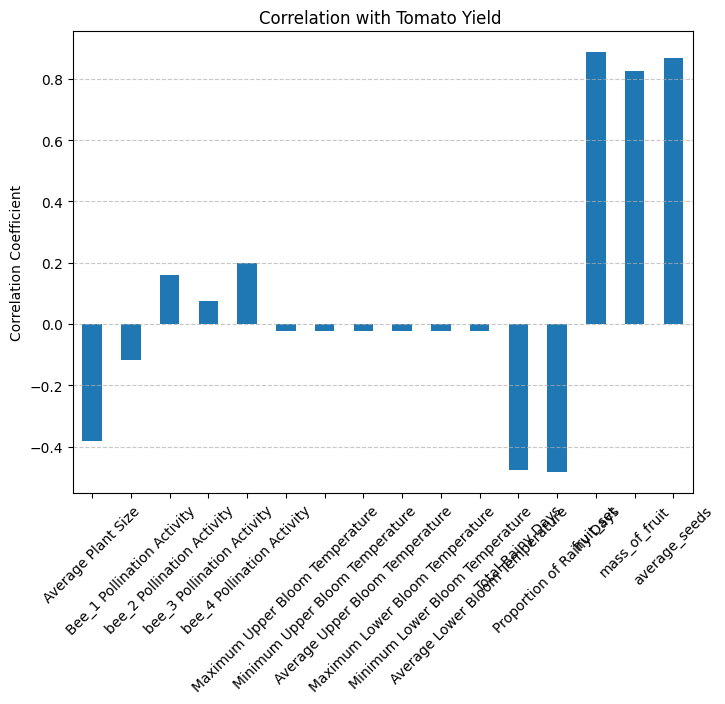

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))
corr_tomato_yield.drop('tomato_yield').plot(kind='bar', ax=ax)
ax.set_title('Correlation with Tomato Yield ')
ax.set_ylabel('Correlation Coefficient')
plt.xticks(rotation=45)  # Rotate labels to improve readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# **Fitting Linear Regression Model - Understanding the impact of the different features on the Tomato Yield**

We created a regression with the highest correlation of variables with tomatoes_yield to get a better view of these connections.



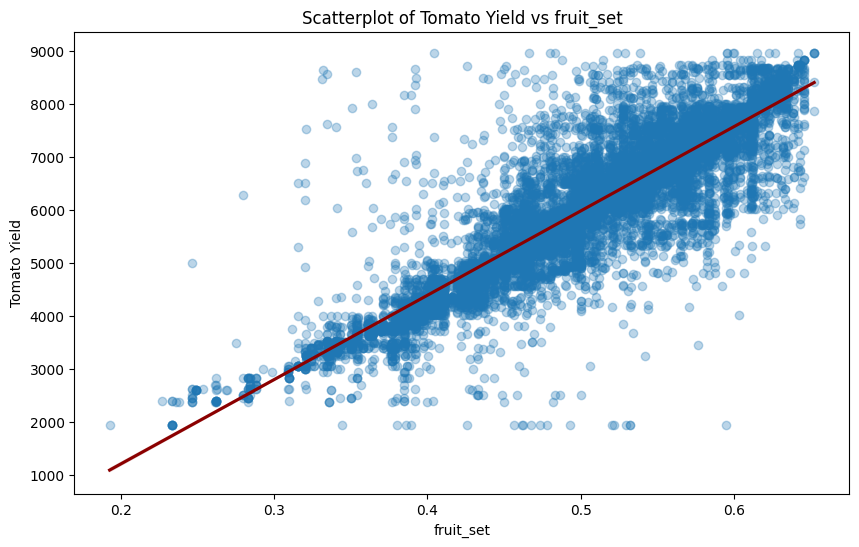

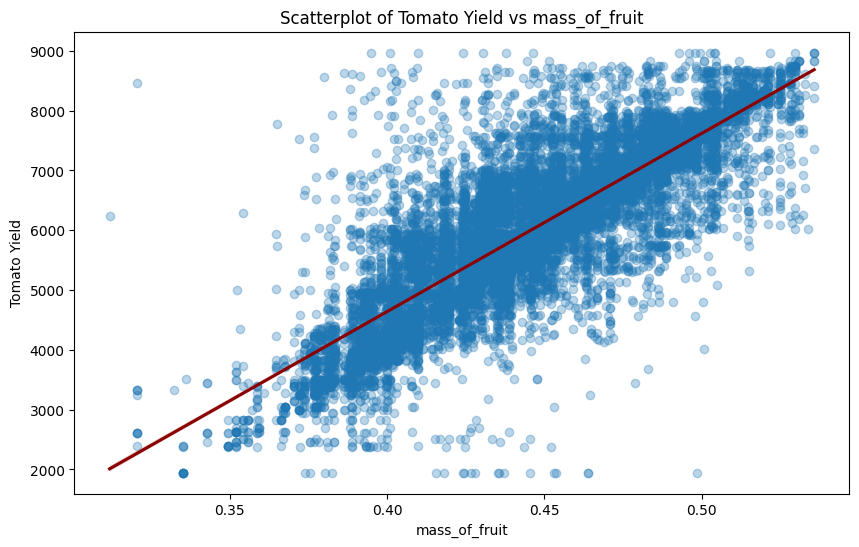

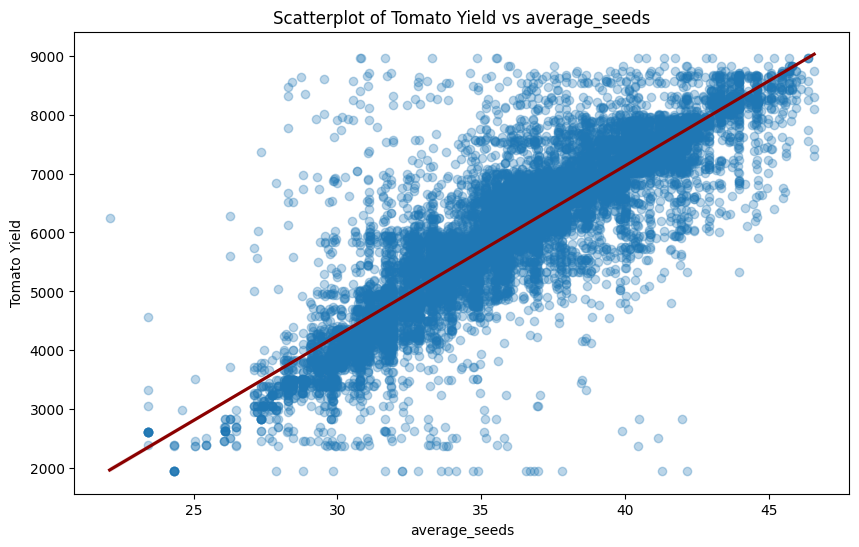

In [ ]:
#Identify variables with correlation above 0.7 with 'tomato_yield'
high_corr_vars = correlation_matrix.index[correlation_matrix['tomato_yield'] > 0.7].tolist()
high_corr_vars.remove('tomato_yield')

#Create scatterplots with regression lines
for var in high_corr_vars:
    plt.figure(figsize=(10, 6))
    sns.regplot(x=tomatoes_data[var], y=tomatoes_data['tomato_yield'], scatter_kws={'alpha':0.3}, line_kws={'color': 'darkred'})
    plt.xlabel(var)
    plt.ylabel('Tomato Yield')
    plt.title(f'Scatterplot of Tomato Yield vs {var}')
    plt.show()

The scatterplots above illustrates the relationship between Tomato Yield and the highest correlated variables as noted in each plot. The scatter plot seem similare - there is a clear positive correlation between these variables to the tomatoe yield, as indicated by the upward trend in the data points and the fitted regression line. This suggests that as the fruit set, mass of fruit and average seeds increases, the tomato yield also tends to increase. The dense clustering of points around the line further emphasizes the strong relationship between the variables.

# **Outliers Localisation**

In order to adress the outliers we will use Z-score method. the method identifies outliers based on Z-scores and limits them to a certain range determined by the threshold. It then counts how many values were changed in the process. This method helps mitigate the effect of extreme outliers in the data without completely removing them.



.


In [ ]:

z_scores = stats.zscore(tomatoes_data)
threshold = 3
outliers = np.abs(z_scores) > threshold

# Count the total outliers for each column
outliers_count = outliers.sum()

# Calculate the upper and lower caps for each column
caps = tomatoes_data.mean() + threshold * tomatoes_data.std()
floors = tomatoes_data.mean() - threshold * tomatoes_data.std()

# Apply the caps using clip function for each column
df_capped = tomatoes_data.clip(lower=floors, upper=caps, axis=1)
# Determine which values were changed by the capping
changed_values_mask = tomatoes_data != df_capped

# Count the number of changes per column
changes_per_column = changed_values_mask.sum()
print(changes_per_column)



Average Plant Size                  2
Bee_1 Pollination Activity          8
bee_2 Pollination Activity         15
bee_3 Pollination Activity          8
bee_4 Pollination Activity         56
Maximum Upper Bloom Temperature     2
Minimum Upper Bloom Temperature     0
Average Upper Bloom Temperature     0
Maximum Lower Bloom Temperature     0
Minimum Lower Bloom Temperature     0
Average Lower Bloom Temperature     0
Total Rainy Days                    0
Proportion of Rainy Days            0
fruit_set                          57
mass_of_fruit                      22
average_seeds                      14
tomato_yield                       26
dtype: int64


The Z-scores for each value in the DataFrame are calculated using the z-score function from scipy.stats. This standardizes the data by subtracting the mean and dividing by the standard deviation for each column. The result is z_scores DataFrame, where each value represents how many standard deviations away from the mean the original value was.
We set a threshold of 3 is set, which is standard practice for identifying outliers in a normal distribution. Values with a Z-score higher than 3 or lower than -3 are considered outliers.
For each column, a cap (upper limit) and floor (lower limit) are calculated using the mean and standard deviation, multiplied by the threshold. These represent the maximum and minimum values allowed before a data point is considered an outlier.
The clip method is used on the DataFrame df to ensure that all values stay within the bounds set by floors and caps. This method "clips" values to the caps and floors, effectively capping outliers to these limits.

At last, a comparison is made between the original DataFrame df and the capped DataFrame df_capped. The resulting changed_values_mask is a boolean DataFrame where True indicates a change due to capping. Summing up the True values in this mask gives you the number of changes for each column.



# **Empirical Distribution Plotting**

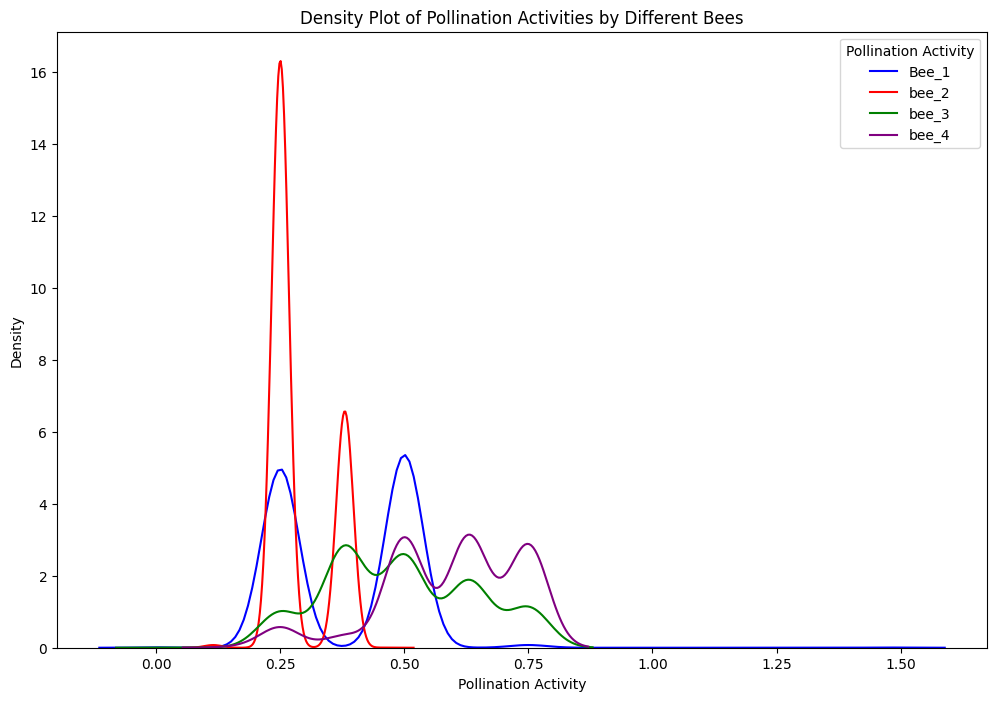

In [ ]:
#Graph 1 - Bees Pollination Activity
plt.figure(figsize=(12, 8))

sns.kdeplot(df_capped['Bee_1 Pollination Activity'], bw_adjust=2, color='blue', label='Bee_1')
sns.kdeplot(df_capped['bee_2 Pollination Activity'], bw_adjust=2, color='red', label='bee_2')
sns.kdeplot(df_capped['bee_3 Pollination Activity'], bw_adjust=2, color='green', label='bee_3')
sns.kdeplot(df_capped['bee_4 Pollination Activity'], bw_adjust=2, color='purple', label='bee_4')

plt.legend(title='Pollination Activity')
plt.title('Density Plot of Pollination Activities by Different Bees')
plt.xlabel('Pollination Activity')
plt.ylabel('Density')

plt.show()

The density plot illustrates the pollination activities of four different bees. Bee_2 shows a very sharp peak around the 0.25 mark, indicating a high frequency of activity at this specific level, and minimal activity elsewhere. Bee_1 has a broader distribution with peaks around 0.25 and 0.55, suggesting varied pollination activity levels. Bee_3 and Bee_4 display more dispersed activity with peaks around 0.3 and 0.75, respectively, indicating a wider range of pollination activities compared to Bee_2 and Bee_1.

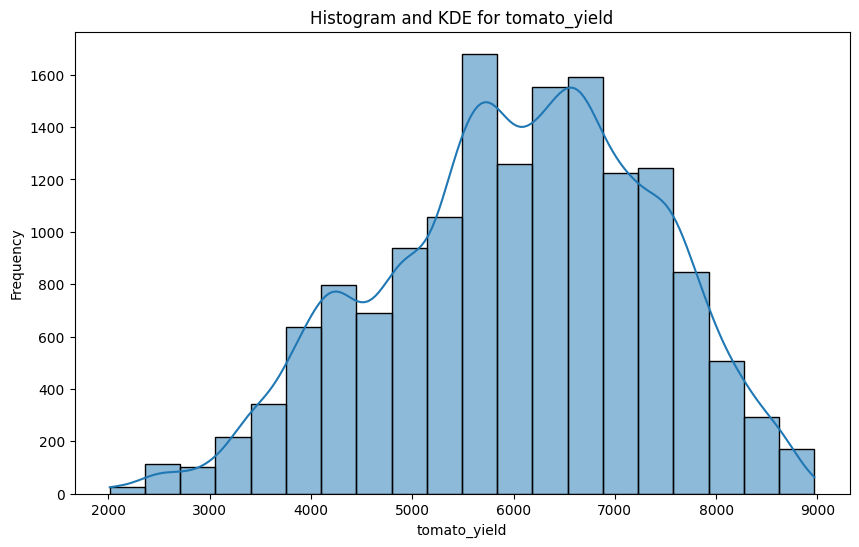

In [ ]:

plt.figure(figsize=(10, 6))
sns.histplot(df_capped['tomato_yield'], kde=True, bins=20)
plt.title(f'Histogram and KDE for tomato_yield')
plt.xlabel('tomato_yield')
plt.ylabel('Frequency')
plt.show()

In the current graph you can see that the "tomato_yield" rate is distributed close to normal, with a little left tail, which indicates that the center of the yield is high, which is about 6,500.

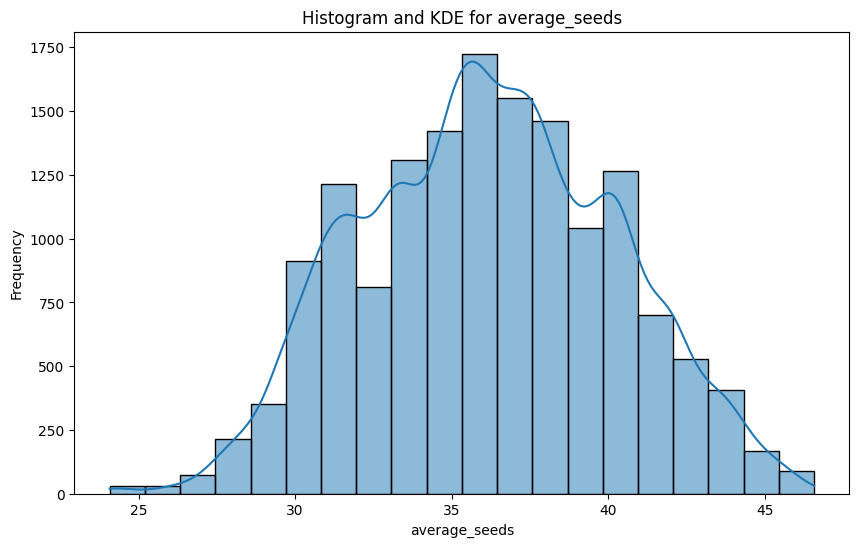

In [ ]:

plt.figure(figsize=(10, 6))
sns.histplot(df_capped['average_seeds'], kde=True, bins=20)
plt.title(f'Histogram and KDE for average_seeds')
plt.xlabel('average_seeds')
plt.ylabel('Frequency')
plt.show()

In the current count indicating the amount of seeds, it can be seen that the distribution is normal between 20 and 50, with an average of about 35 and a uniform distribution,

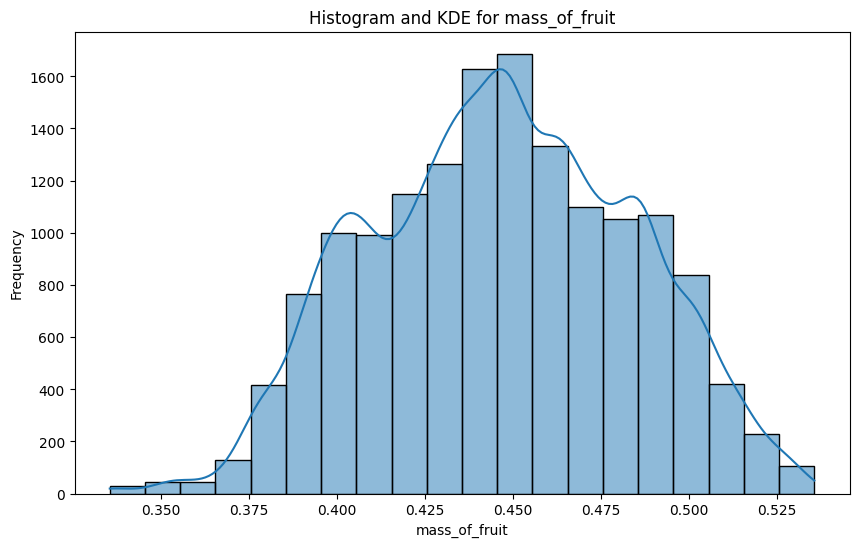

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df_capped['mass_of_fruit'], kde=True, bins=20)
plt.title(f'Histogram and KDE for mass_of_fruit')
plt.xlabel('mass_of_fruit')
plt.ylabel('Frequency')
plt.show()

From the graph showing the mass of the fruit it can be seen that the distribution is slightly inclined to the right with a left tail, the center of the graph moves approximately to 0.44 when the average is 0.45

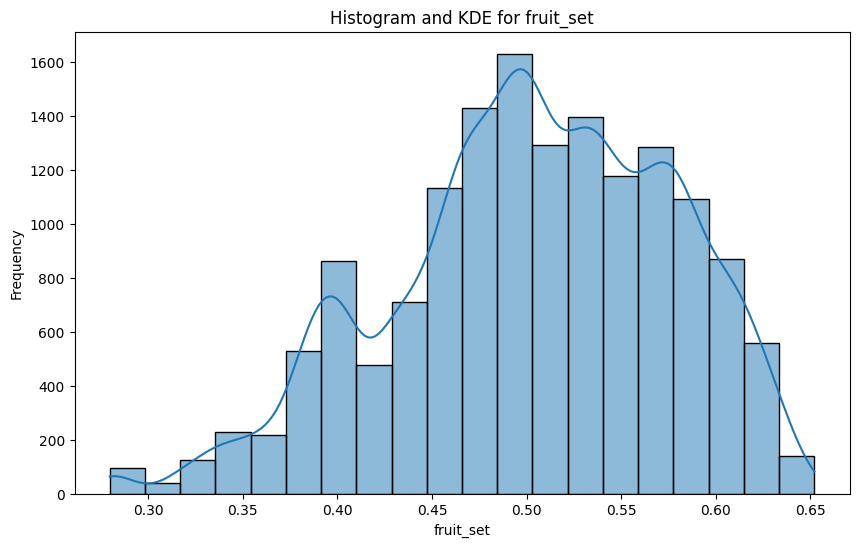

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df_capped['fruit_set'], kde=True, bins=20)
plt.title(f'Histogram and KDE for fruit_set')
plt.xlabel('fruit_set')
plt.ylabel('Frequency')
plt.show()

The graph shows the distribution of the fruit_set data, with most values clustered around 0.5, indicating this is the most common value. The distribution ranges from 0.3 to 0.65 and exhibits slight right skewness, suggesting a few higher values.